In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Regresja **softmax**

In [3]:
s = [0.2, 0.1, 0.6, 0.1]
exps = [np.exp(i) for i in s]
sum_of_exps = sum(exps)
softmax = [j/sum_of_exps for j in exps]

##3 gangi

Zbiór danych:

In [4]:
x_label0 = np.random.normal(1, 1.5, (1000, 1)) 
y_label0 = np.random.normal(1, 1.5, (1000, 1)) 
x_label1 = np.random.normal(5, 1.5, (1000, 1)) 
y_label1 = np.random.normal(4, 1.5, (1000, 1)) 
x_label2 = np.random.normal(8, 1.5, (1000, 1)) 
y_label2 = np.random.normal(0, 1.5, (1000, 1)) 

In [5]:
data_label0 = np.concatenate([x_label0, y_label0],axis=1) 
data_label1 = np.concatenate([x_label1, y_label1],axis=1)  
data_label2 = np.concatenate([x_label2, y_label2],axis=1)   
points = np.concatenate([data_label0, data_label1, data_label2],axis=0) 

Kodowanie one-hot

In [6]:
labels = np.array([[1., 0., 0.]] * len(data_label0) + [[0., 1., 0.]] * len(data_label1) + [[0.,0., 1.]] * len(data_label2))

In [7]:
points.shape,labels.shape

((3000, 2), (3000, 3))

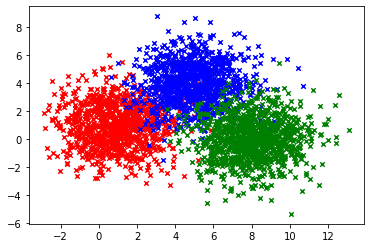

In [8]:
plt.scatter(x_label0, y_label0, c='r', marker='x', s=20)
plt.scatter(x_label1, y_label1, c='b', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='x', s=20)
plt.show()

In [9]:
model = Sequential()

In [10]:
model.add(Dense(units = 3, use_bias=True, input_dim=2, activation = "softmax"))

In [11]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.Adam()
#opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [12]:
model.compile(loss='binary_crossentropy',optimizer=opt)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [14]:
epochs = 1000
#h = model.fit(data_points,labels, verbose=1, epochs=epochs,validation_split=0.2)
h = model.fit(points,labels, verbose=1, epochs=epochs, batch_size= 70, validation_split=0.2)

Epoch 1/1000
35/35 [==============================] - 1s 9ms/step - loss: 1.3370 - val_loss: 2.4286
Epoch 2/1000
35/35 [==============================] - 0s 3ms/step - loss: 1.2647 - val_loss: 2.4001
Epoch 3/1000
35/35 [==============================] - 0s 3ms/step - loss: 1.1980 - val_loss: 2.3642
Epoch 4/1000
35/35 [==============================] - 0s 3ms/step - loss: 1.1366 - val_loss: 2.3146
Epoch 5/1000
35/35 [==============================] - 0s 3ms/step - loss: 1.0801 - val_loss: 2.2635
Epoch 6/1000
35/35 [==============================] - 0s 3ms/step - loss: 1.0286 - val_loss: 2.1984
Epoch 7/1000
35/35 [==============================] - 0s 3ms/step - loss: 0.9805 - val_loss: 2.1313
Epoch 8/1000
35/35 [==============================] - 0s 3ms/step - loss: 0.9358 - val_loss: 2.0582
Epoch 9/1000
35/35 [==============================] - 0s 3ms/step - loss: 0.8938 - val_loss: 1.9663
Epoch 10/1000
35/35 [==============================] - 0s 3ms/step - loss: 0.8542 - val_loss: 1.8765

In [15]:
Loss = h.history['loss']
Loss

[1.3370108604431152,
 1.2647217512130737,
 1.1980067491531372,
 1.1366325616836548,
 1.0801353454589844,
 1.0285942554473877,
 0.9805356860160828,
 0.9357685446739197,
 0.8938179612159729,
 0.854226291179657,
 0.8163980841636658,
 0.7803532481193542,
 0.746191143989563,
 0.7138199210166931,
 0.6834538578987122,
 0.6547979712486267,
 0.6285397410392761,
 0.6041882038116455,
 0.5821382403373718,
 0.5621266961097717,
 0.5434098839759827,
 0.5267061591148376,
 0.5113332867622375,
 0.4975837767124176,
 0.4847470223903656,
 0.4730782210826874,
 0.4623537063598633,
 0.45235463976860046,
 0.4430852234363556,
 0.4344392418861389,
 0.4264337420463562,
 0.41889268159866333,
 0.41184988617897034,
 0.40526899695396423,
 0.3991053104400635,
 0.3932340741157532,
 0.38770580291748047,
 0.3824078440666199,
 0.37743812799453735,
 0.37274834513664246,
 0.3682217001914978,
 0.36390596628189087,
 0.3597489595413208,
 0.35580557584762573,
 0.3519827425479889,
 0.34834492206573486,
 0.3447987139225006,
 0.34

In [16]:
weights = model.get_weights()

print(weights[0])
print(weights[1])    #bias

[[-1.963214   0.392408   1.4140855]
 [-0.9900861  1.5471411 -1.2999952]]
[ 8.10579   -5.5480375 -7.5953736]


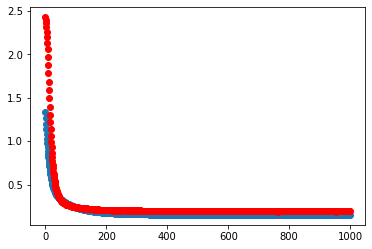

In [17]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

In [18]:
model.predict([[4,6]])

1/1 [==============================] - 0s 86ms/step


array([[1.6835167e-05, 9.9998295e-01, 2.9289262e-07]], dtype=float32)